<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/basic_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Visualizations - CS 155 Project 2

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv")

USER_ID = data["User ID"]
MOVIE_ID = data["Movie ID"]
RATING = data["Rating"]

genres = list(movies.columns)[2:]
movie_to_rating_count = MOVIE_ID.value_counts()
movie_to_avg_rating = data[['Movie ID', 'Rating']].groupby(by='Movie ID').mean().sort_values(by=['Rating'], ascending=False)

In [ ]:
display(data)

,User ID,Movie ID,Rating
0,0,88,4.0
1,0,545,3.5
2,0,7,3.0
3,0,401,4.0
4,0,1230,0.5
...,...,...,...
121496,991,681,1.0
121497,991,736,3.5
121498,991,162,3.0
121499,991,1242,3.5


In [ ]:
display(movies)

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,"10,000 BC (2008)",0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,12 Years a Slave (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,127 Hours (2010),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,Zoolander (2001),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,1496,Zootopia (2016),0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,1497,[REC] (2007),0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1498,1498,xXx (2002),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Basic Visualizations

Basic Visualization 1: All ratings in the MovieLens Dataset

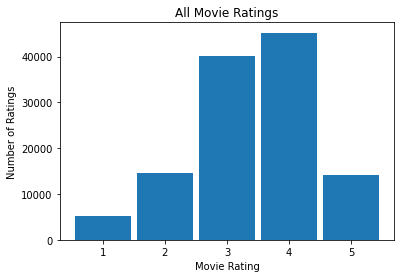

In [ ]:
# Basic Visualization 1

# All ratings in MovieLens Dataset
plt.figure()
plt.hist(RATING,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("All Movie Ratings")
plt.savefig("Bar Chart of All Ratings")
plt.show()

Basic Visualization 2: All ratings of the ten most popular movies

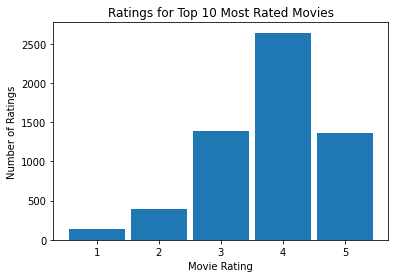

Average ratings for the top 10 most popular movies:
[4.0328, 4.0224, 4.0587, 3.7467, 3.7974, 4.0971, 3.875, 3.8346, 3.9066, 3.7882]
The top 10 most popular movies all have average ratings between 3.7 and 4.1


In [ ]:
# Basic Visualization 2

# All rating of the ten most popular movies (movies which have received the most ratings)
top10pop_ids = movie_to_rating_count.nlargest(10).index 
top10pop_ratings = data[data['Movie ID'].isin(top10pop_ids)]['Rating']

plt.figure()
plt.hist(top10pop_ratings,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("Ratings for Top 10 Most Rated Movies")
plt.savefig("Bar Chart of Top 10 Most Popular Movies Ratings")
plt.show()

top10pop_avg_ratings = [round(movie_to_avg_rating.loc[pop_id].at["Rating"], 4) for pop_id in top10pop_ids]
print("Average ratings for the top 10 most popular movies:")
print(top10pop_avg_ratings)
print("The top 10 most popular movies all have average ratings between 3.7 and 4.1")

Basic Visualization 3: All ratings of the ten best movies

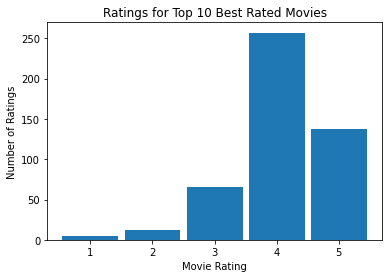

Average ratings for the top 10 best (highly rated) movies:
[4.4677, 4.4545, 4.3, 4.275, 4.2647, 4.2586, 4.2419, 4.2015, 4.1875, 4.1765]
The top 10 best (highly rated) movies all have average ratings between 4.1 and 4.5


In [ ]:
# Basic Visualization 3

# All ratings of the ten best movies (movies with the highest average ratings)
top10best_ids = data[['Movie ID', 'Rating']].groupby(by='Movie ID').mean().sort_values(by=['Rating'], ascending=False).nlargest(10, "Rating").index
top10best_ratings = data[data['Movie ID'].isin(top10best_ids)]['Rating']

plt.figure()
plt.hist(top10best_ratings,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("Ratings for Top 10 Best Rated Movies")
plt.savefig("Bar Chart of Top 10 Best Rated Movies Ratings")
plt.show()

top10best_avg_ratings = [round(movie_to_avg_rating.loc[best_id].at["Rating"], 4) for best_id in top10best_ids]
print("Average ratings for the top 10 best (highly rated) movies:")
print(top10best_avg_ratings)
print("The top 10 best (highly rated) movies all have average ratings between 4.1 and 4.5")

Basic Visualization 4: All ratings of movies from three genres of your choice

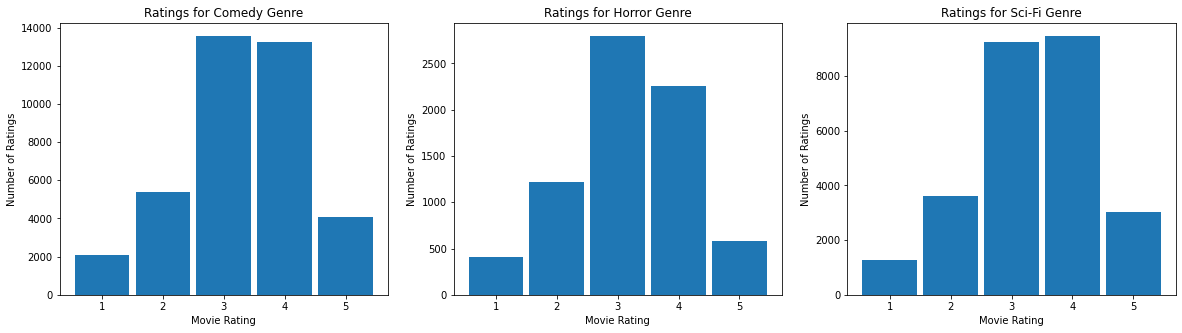

In [ ]:
# Basic Visualization 4

# All ratings of movies from three genres of your choice (three separate visualizations)
comedy_movies = movies[movies['Comedy']==1]['Movie ID'] 
comedy_ratings = data[data['Movie ID'].isin(comedy_movies)]['Rating']

horror_movies = movies[movies['Horror']==1]['Movie ID']
horror_ratings = data[data['Movie ID'].isin(horror_movies)]['Rating']

scifi_movies = movies[movies['Sci-Fi']==1]['Movie ID']
scifi_ratings = data[data['Movie ID'].isin(scifi_movies)]['Rating']

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(comedy_ratings,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("Ratings for Comedy Genre")

plt.subplot(1,3,2)
plt.hist(horror_ratings,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("Ratings for Horror Genre")

plt.subplot(1,3,3)
plt.hist(scifi_ratings,bins=[1,2,3,4,5,6],histtype='bar',rwidth=.9,align='left')
plt.xlabel('Movie Rating')
plt.ylabel("Number of Ratings")
plt.title("Ratings for Sci-Fi Genre")
plt.savefig("Bar Charts of Ratings by Genre")
plt.show()

# Extra Visualizations

Extra Visualization 1: Percent of Movies by Genre

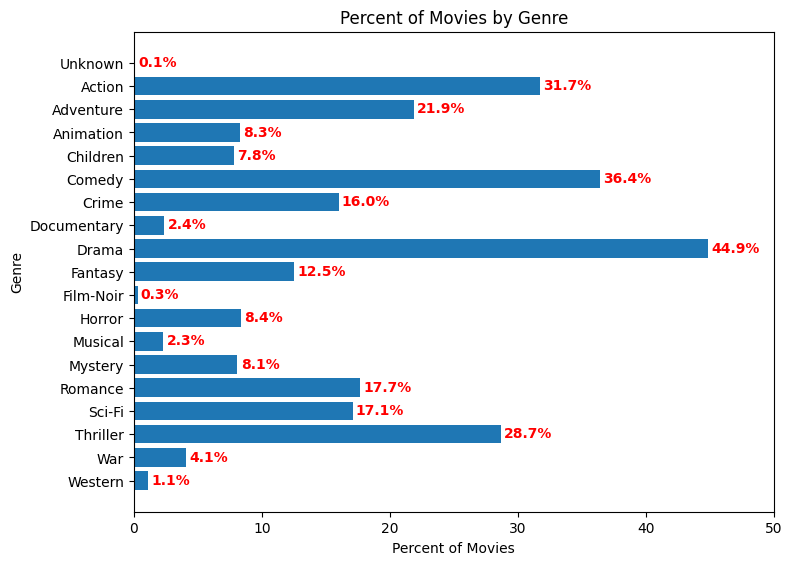

In [ ]:
# Extra Visualization: Percent of Movies by Genre
total_movies = len(movies)
movies_by_genre = [round(100.0 * movies[genre].value_counts()[1] / total_movies, 1) for genre in genres]

plt.rcdefaults()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(genres, movies_by_genre)
plt.xlim(0, 50)
ax.invert_yaxis()
for i, v in enumerate(movies_by_genre):
    ax.text(v + 0.25, i + .15, str(v) + "%", color = 'red', fontweight = 'bold')
plt.xlabel("Percent of Movies")
plt.ylabel('Genre')
plt.title("Percent of Movies by Genre")
plt.show()

Extra Visualization 2: Percent of Ratings by Genre

121501


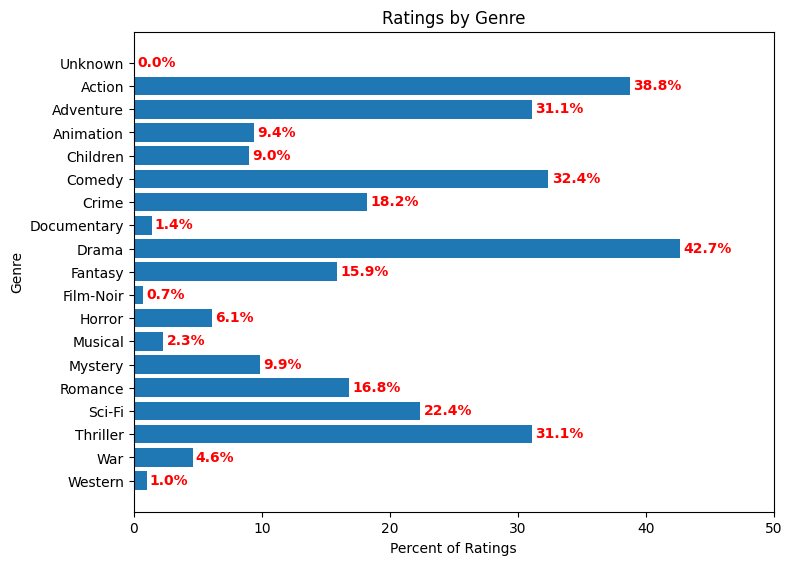

In [ ]:
# Extra Visualization 2: Percent of Ratings by Genre
def movie_id_to_movie_info(id):
  return movies.loc[id]

total_ratings = len(MOVIE_ID)
print(total_ratings)
rated_movies = MOVIE_ID.apply(movie_id_to_movie_info)
ratings_by_genre = [round(100.0 * rated_movies[genre].value_counts()[1] / total_ratings, 1) for genre in genres]

plt.rcdefaults()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(genres, ratings_by_genre)
plt.xlim(0, 50)
ax.invert_yaxis()
for i, v in enumerate(ratings_by_genre):
    ax.text(v + 0.25, i + .15, str(v) + "%", color = 'red', fontweight = 'bold')
plt.xlabel("Percent of Ratings")
plt.ylabel('Genre')
plt.title("Ratings by Genre")
plt.show()

## Extra Visualization Takeaways

We plotted the percent of movies and ratings by genre to see if the movies of any genre we're getting a disproproportionate amount of ratings, which could have led to potential bias in our model. 

From the plots, we can see that the percent of movies by genre is about proportionate to the number of ratings those movies recieved. Obviously, it's not perfect as we have some genres getting disproportionally more ratings (i.e Action, Adventure, and SciFi) and other genres that have disproportionally less ratings (i.e Comedy, Drama, and Horror), but for the most part, the ratings are about proportionally distributed throughout genres (< 10% discrepancy for all genres). With this, we can be pretty confident that our model won't suffer from bias due to an imbalance in our data.